# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# Params per documentation
# latitude = lat
# longitude = lon
# For temperature in Fahrenheit/mph use units=imperial
# City ID = id
# City name = name
# lat  = coord.lat
# humidity% = main.humidity
# cloudiness% = clouds.all
# windspeed% = wind.speed

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build query URL(endpoint)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# response = requests.get(query_url)

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count=0
missing=0

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json()
    
#     print(response)
#     if (count>10): break

    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])                
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1

        print(f"Processing record {count} of {len(cities)}: | {city}")
    except:
        print("City not found, skipping")
        
    time.sleep(2)

City not found, skipping
Processing record 1 of 608: | airai
Processing record 2 of 608: | new norfolk
Processing record 3 of 608: | bonthe
Processing record 4 of 608: | bluff
Processing record 5 of 608: | pacific grove
Processing record 6 of 608: | bambous virieux
Processing record 7 of 608: | carnarvon
Processing record 8 of 608: | plettenberg bay
Processing record 9 of 608: | launceston
Processing record 10 of 608: | teguldet
Processing record 11 of 608: | fortuna
Processing record 12 of 608: | rikitea
Processing record 13 of 608: | severo-kurilsk
Processing record 14 of 608: | kununurra
Processing record 15 of 608: | ixtapa
Processing record 16 of 608: | hobart
Processing record 17 of 608: | punta arenas
Processing record 18 of 608: | ushuaia
Processing record 19 of 608: | constitucion
Processing record 20 of 608: | nikolskoye
Processing record 21 of 608: | kapaa
City not found, skipping
Processing record 22 of 608: | avarua
Processing record 23 of 608: | qaanaaq
Processing record 

Processing record 192 of 608: | curvelo
Processing record 193 of 608: | tonj
Processing record 194 of 608: | tasiilaq
Processing record 195 of 608: | tateyama
City not found, skipping
Processing record 196 of 608: | corrales
Processing record 197 of 608: | ust-ordynskiy
Processing record 198 of 608: | puerto madryn
Processing record 199 of 608: | port lincoln
Processing record 200 of 608: | acapulco
Processing record 201 of 608: | ageyevo
Processing record 202 of 608: | byron bay
Processing record 203 of 608: | lexington
Processing record 204 of 608: | turochak
Processing record 205 of 608: | gayny
Processing record 206 of 608: | batagay
Processing record 207 of 608: | anadyr
Processing record 208 of 608: | rehoboth
Processing record 209 of 608: | atambua
Processing record 210 of 608: | fereydun kenar
Processing record 211 of 608: | oktyabrskiy
Processing record 212 of 608: | izumo
Processing record 213 of 608: | lakes entrance
Processing record 214 of 608: | sao joao da barra
Processi

Processing record 384 of 608: | sahbuz
Processing record 385 of 608: | alice springs
Processing record 386 of 608: | rozivka
Processing record 387 of 608: | nishihara
Processing record 388 of 608: | fria
Processing record 389 of 608: | olavarria
City not found, skipping
Processing record 390 of 608: | pitea
Processing record 391 of 608: | matay
Processing record 392 of 608: | port hardy
Processing record 393 of 608: | phonhong
Processing record 394 of 608: | neiafu
Processing record 395 of 608: | talnakh
Processing record 396 of 608: | gravdal
Processing record 397 of 608: | ostrovnoy
Processing record 398 of 608: | ancud
Processing record 399 of 608: | singkang
Processing record 400 of 608: | somerset
Processing record 401 of 608: | samarai
Processing record 402 of 608: | siguiri
Processing record 403 of 608: | kieta
City not found, skipping
Processing record 404 of 608: | del rio
Processing record 405 of 608: | santiago de cao
Processing record 406 of 608: | sorland
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Dictionary to DataFrame
# #export data into a csv
weather_dict = {"City": city_name,
               "Lat": lat,
               "Lng": lng,
               "Max Temp": max_temp,
               "Humidity": humidity,
               "Cloudiness (%)": cloudiness,
               "Wind Speed (m/s)": wind_speed,
               "Country": country,
               "Date": date}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()
weather_df.to_csv('../Output_data/Output_weather_data.csv')

In [10]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Airai,-8.93,125.41,54.50,100,58,3.44,TL,1596023181
1,New Norfolk,-42.78,147.06,48.99,78,41,3.00,AU,1596023183
2,Bonthe,7.53,-12.51,78.33,78,99,10.85,SL,1596023185
3,Bluff,-46.60,168.33,48.97,90,100,10.60,NZ,1596023187
4,Pacific Grove,36.62,-121.92,57.20,93,90,3.36,US,1596023160
...,...,...,...,...,...,...,...,...,...
557,Sfântu Gheorghe,45.87,25.78,84.99,52,0,1.01,RO,1596024518
558,Sobolevo,54.43,31.90,71.58,88,86,9.57,RU,1596024521
559,Barra do Garças,-15.89,-52.26,75.40,45,65,1.57,BR,1596024525
560,Ivanovka,42.89,75.08,80.60,36,75,8.95,KG,1596024527


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
weather_df['Humidity']>100

0      False
1      False
2      False
3      False
4      False
       ...  
557    False
558    False
559    False
560    False
561    False
Name: Humidity, Length: 562, dtype: bool

In [ ]:
#ALL SKIPPED AS NO CITY WITH OUTLIER HUMIDITY OVER 100%

#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

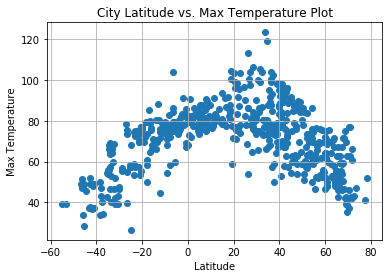

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o") 
plt.title("City Latitude vs. Max Temperature Plot")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

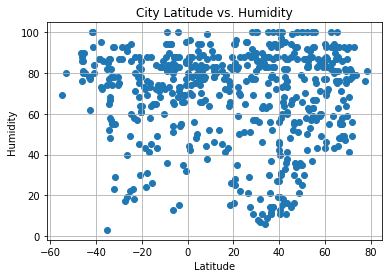

In [19]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o") 
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

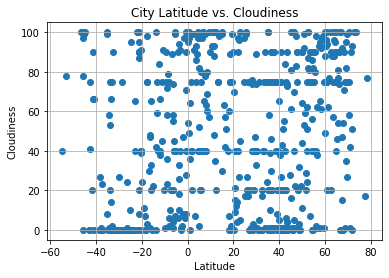

In [22]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness (%)"], marker="o") 
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

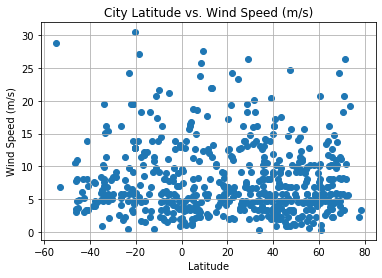

In [23]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed (m/s)"], marker="o") 
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
weather_df['']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = d_cap["Weight (g)"]
y_values = d_cap["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=25,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.title("Mouse Weight versus Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression